In [308]:
%matplotlib inline
import cv2 as cv
import time
import numpy as np
import os
import pascal_voc_writer 
import skimage
import matplotlib.pyplot as plt
import matplotlib
import math


In [606]:
def extract_frames(path, start_frame=0, stop_frame=0, invert=True, apply_func=None, step=1, *args, **kwargs):
    video = cv.VideoCapture(path)
    num_frames = int(video.get(cv.CAP_PROP_FRAME_COUNT))
    if stop_frame == 0:
        stop_frame = num_frames
    frames = [None] * num_frames
    for i in range(start_frame, stop_frame):
        _, frame = video.read()
        # frame = to_8bit(frame)
        if invert: frame = invert_color(frame)
        if i % step == 0 and callable(apply_func):
            apply_func(path, frame, i, *args, **kwargs)
        frames[i] = frame
    video.release()
    return frames

def play(frames, stop_key=" "):
    for frame in frames:
        cv.imshow('Example', frame)
        if cv.waitKey(20) & 0xFF==ord(stop_key):
            break
    cv.destroyAllWindows()
    
def invert_color(frame):
    return skimage.util.invert(frame)

In [607]:
def save_frame(path_to_video, frame, i, target_dir=""):
    video_name = path_to_video.split("/")[-1]
    img_name = video_name.split(".")[0] + str(i) + ".png"
    img_path = target_dir + "/" + img_name
    cv.imwrite(img_path, frame)
    

In [608]:
# frames = extract_frames("./TrainingData/Videos/01hz left.avi")
# play(frames)


In [609]:
# for file in os.listdir("./TrainingData/Videos/"):
#     path_to_video = "./TrainingData/Videos/" + file
#     # print(path_to_video)
#     extract_frames(path_to_video, 0, 20, True, save_frame, 1, "./TrainingData/Images/Raw")

In [611]:
def display(img):
    fig, ax = plt.subplots()
    fig.tight_layout()
    ax.imshow(img, cmap='gray')

In [314]:
def read(path, eight_bit=False, invert=False):
    if eight_bit: 
        img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    else:
        img = cv.imread(path)
    if invert: img = invert_color(img)
    return img

In [315]:
# for file in os.listdir("./TrainingData/Images/Particles/Original"):
#     path_to_original = "./TrainingData/Images/Particles/Original/" + file
#     path_to_photoshpped = "./TrainingData/Images/Particles/Photoshopped/" + file.split(".")[0] + ".jpg"
#     result = "./TrainingData/Images/Particles/NoBackground/" + file
#     original = read(path_to_original)
#     photoshopped = read(path_to_photoshpped)
#     for i in range(original.shape[0]):
#         for j in range(original.shape[1]):
#             if photoshopped[i][j][0] < 10 and photoshopped[i][j][1] < 10 and photoshopped[i][j][2] < 10:
#                 original[i][j][0] = 0
#                 original[i][j][1] = 0
#                 original[i][j][2] = 0
#     cv.imwrite(result, original)

In [595]:
def convert_to_grayscale(rgb):
    return 0.299 * rgb[0] + 0.587 * rgb[1] + 0.114 * rgb[2]

In [557]:
def get_images(path):
    ret = []
    for file in os.listdir(path):
        ret.append(cv.imread(path + '/' + file))
    return ret

In [601]:
def overlay(src, particle):
    particle = skimage.transform.rescale(particle, np.random.uniform(0.75, 1.25), channel_axis=-1, preserve_range=True)
    particle = skimage.transform.rotate(particle, np.random.randint(0, 360), preserve_range=True).astype(np.uint8)
    location = (np.random.randint(0, src.shape[0] - particle.shape[0]), np.random.randint(0, src.shape[1] - particle.shape[1]))
    # eight_bit_particle = to_8bit(particle)
    for i in range(particle.shape[0]):
        for j in range(particle.shape[1]):
            if convert_to_grayscale(particle[i][j]) > convert_to_grayscale(src[location[0] + i][location[1] + j]):
                src[location[0] + i][location[1] + j] = particle[i][j]

In [602]:
def generate_training_images(particles, bkgs, n_images, save_path=None):
    ret = []
    for i in range(n_images):
        bkg = bkgs[np.random.randint(0, len(bkgs))]
        area = bkg.shape[0] * bkg.shape[1]
        n_particles = np.random.randint(area // 15000 - 4, area // 15000 + 5)
        generated_image = bkg.copy()
        for i in range(n_particles):
            particle = particles[np.random.randint(0, len(particles))]
            overlay(generated_image, particle)
        ret.append(generated_image)
    return ret
        

In [603]:
particles = get_images("./TrainingData/Images/Particles/NoBackground")
bkgs = get_images("./TrainingData/Images/Background")

In [604]:
imgs = generate_training_images(particles, bkgs, 5)

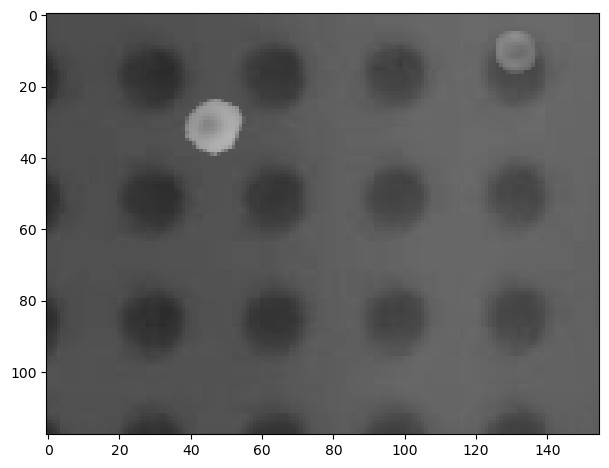

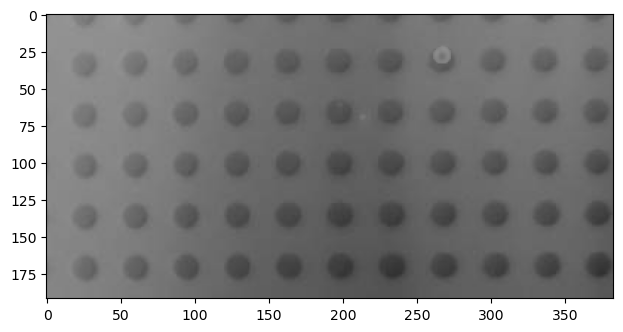

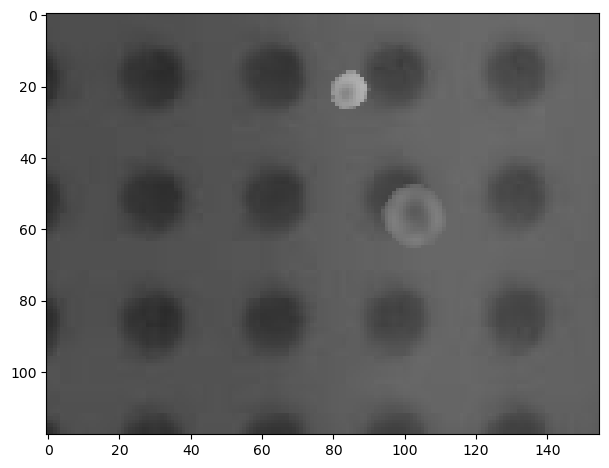

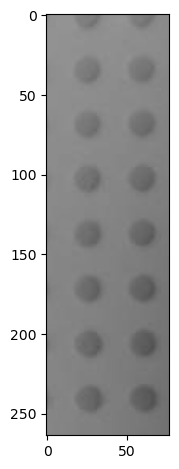

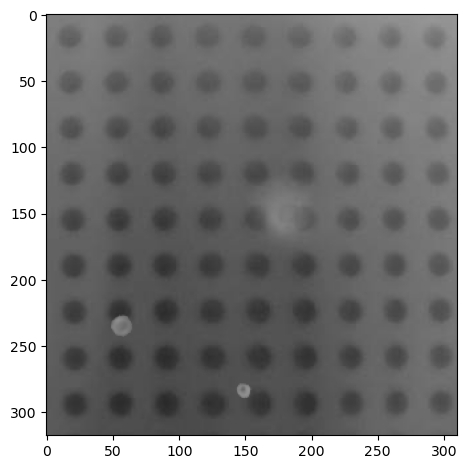

In [605]:
for img in imgs:
    display(img)

In [579]:
print(particles[1])

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
